# Голосование за социал-демократическую партию в Швеции

Задача: предсказать по данным опроса, проголусует ли человек за правящую партию или нет. 

In [31]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats as st
from scipy.stats import norm 

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
import seaborn as sns

Данные European Social Survey за 2014 год. В выборке 1067 ненулевых переменных  
* nwspol - как много времени вы тратите на прочтение/прослушивание новостей (в минутах)   
* polintr - степень заинтересованности в политике (от 1 очень заинтересован до 4 совсем не заинтересован)
* lrscale - положение на идеологической шкале (от 1-лево до 10-право)
* stfeco - степень удовлетворённости экономикой (от 0-совем не удовлетворён до 10- совершенно удовлетворён)
* gincdif - мнение, что государство должно уменьшать разницу в доходах населения от 1 совершенно согласен до  5 совершенно не согласен)  
* freehms - мнение, что ЛГБТ-люди должны жить так, как они хотят (от 1 совершенно согласен до 5 совершенно не согласен) 
* imwbcnt - мнение, что иммигранты делают жизнь страны хуже/лучше (от 0 хуже до 10 лучше)
* rlgdgr - степень религиозности (от 0 совсем до 10 очень религиозен)  
* wrclmch - насколько вы обеспокоены климатическими изменениями (1-совсем не обеспокоен, 5 - очень обеспокоен)
* gvsrdcc - насколько государства достаточно делают для борьбы с изменением климата (1-совсем ничего не делают, 10-делают очень много)   
* smdfslv - степень удовлетворённости демократией
* agea - возраст    
* eduyrs - количество лет образования
* hinctnta - уровень дохода (от 1 до 10)
* hincfel - оценка доходов домохозяйства респондента (от 1 живу комфортно до 4 сложно жить с таким доходом)
* ipstrgv - мнение о том, что государство должно быть сильным и обеспечивать защиту (1-очень важно, 6-совсем не важно)   
* impenv - мнение о том, что важно заботиться об окружающей среде (1-очень важно, 6-совсем не важно)
* imptrad - мнение о том, что важно следовать традициям (1-очень важно, 6-совсем не важно)      
* **target** - голосование за социал-демократов (1-проголосовал)
* gender - пол


In [32]:
sw = pd.read_csv('sweden.csv')

In [33]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1067 non-null   int64  
 1   essround    1067 non-null   int64  
 2   edition     1067 non-null   float64
 3   idno        1067 non-null   int64  
 4   nwspol      1067 non-null   int64  
 5   polintr     1067 non-null   int64  
 6   lrscale     1067 non-null   int64  
 7   stfeco      1067 non-null   int64  
 8   gincdif     1067 non-null   int64  
 9   freehms     1067 non-null   int64  
 10  imwbcnt     1067 non-null   int64  
 11  rlgdgr      1067 non-null   int64  
 12  wrclmch     1067 non-null   int64  
 13  gvsrdcc     1067 non-null   int64  
 14  smdfslv     1067 non-null   int64  
 15  agea        1067 non-null   int64  
 16  eduyrs      1067 non-null   int64  
 17  hinctnta    1067 non-null   int64  
 18  hincfel     1067 non-null   int64  
 19  ipstrgv     1067 non-null  

In [34]:
sw2 = sw.drop(['Unnamed: 0', 'essround', 'edition', 'idno', 'prt','nwspol'], axis = 1)

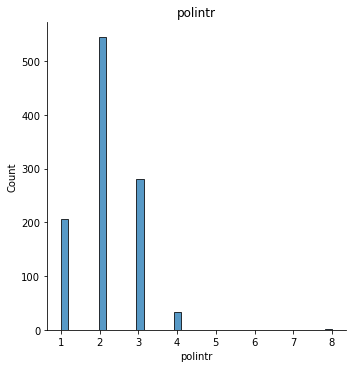

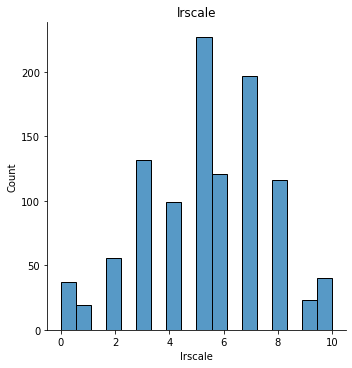

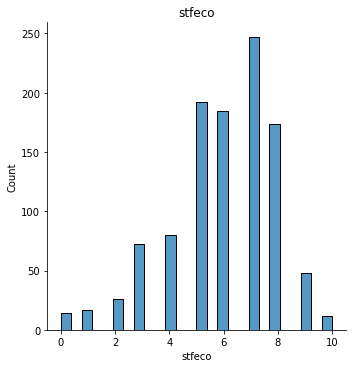

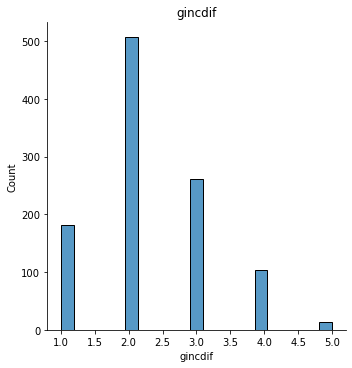

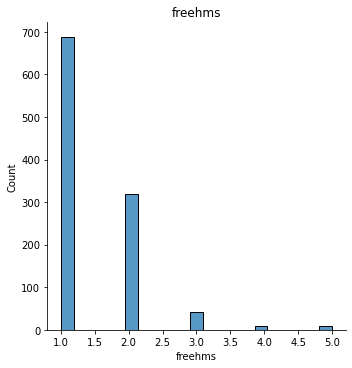

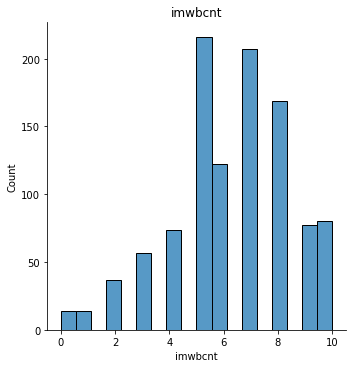

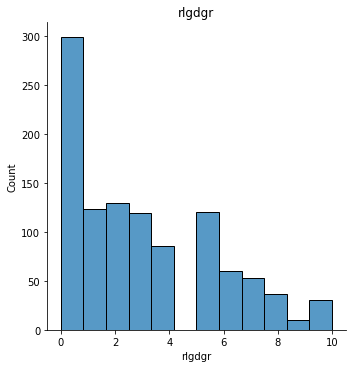

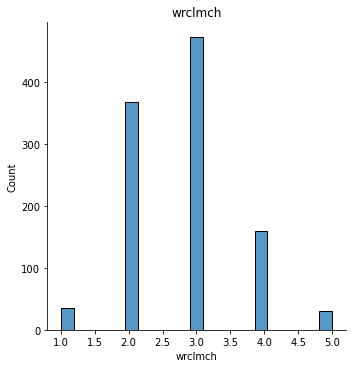

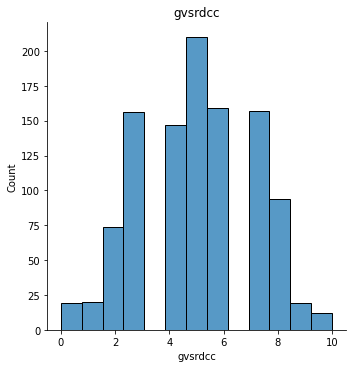

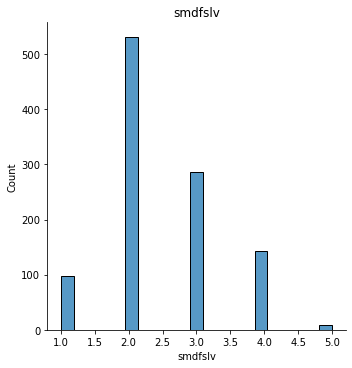

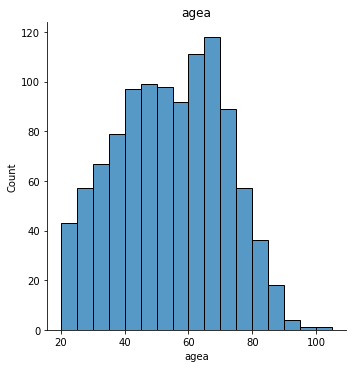

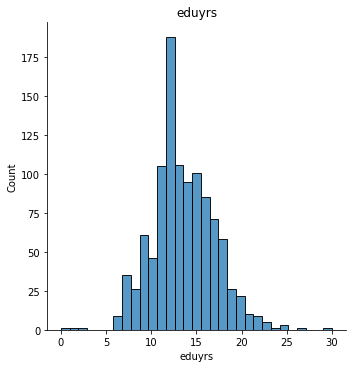

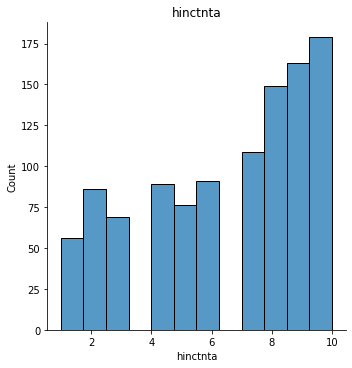

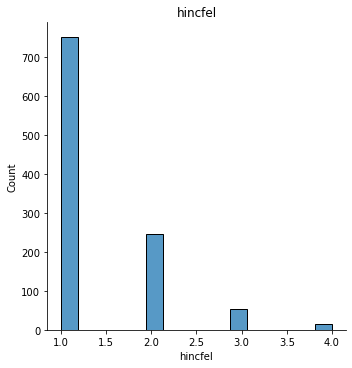

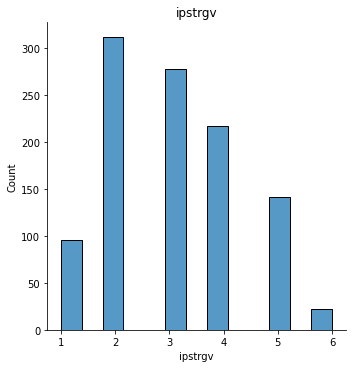

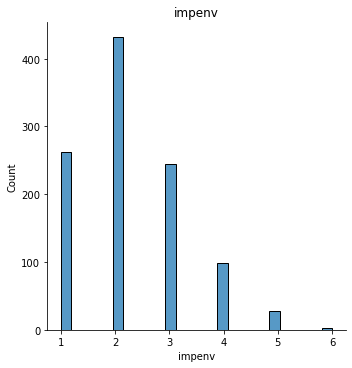

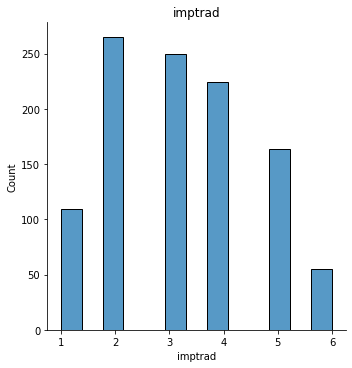

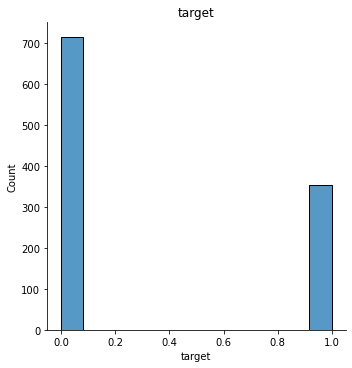

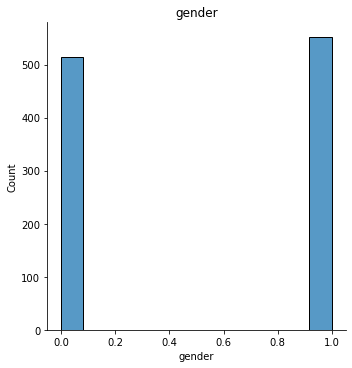

In [35]:
for col in sw2.columns:
    sns.displot(sw2[col])
    plt.title(col)
    plt.show();

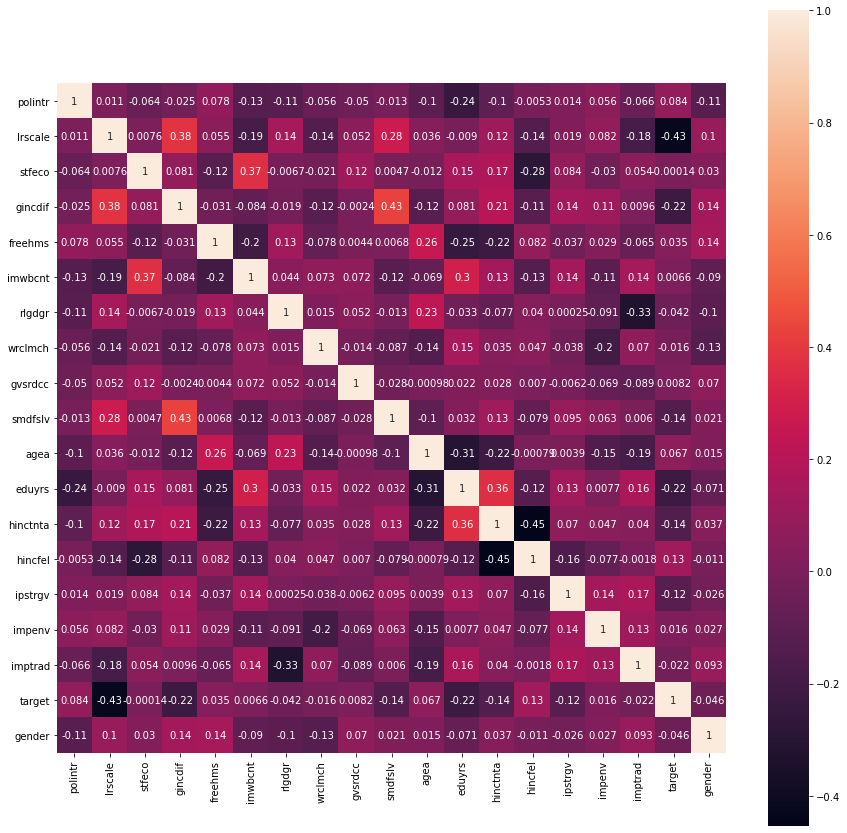

In [36]:
cm = sw2.corr() 
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True , square=True)    
plt.show()

Парные коэффициенты корреляции показывают, что ни один предиктор не связан сильно с другими (нет значений превышающих 0,5 по модулю). Можно включать предикторы в моделях, не опасаясь мультиколлинеарности

Отклик - бинарная переменная. 1 - респондент проголосовал за социал-демократов, 0 - не проголосовал. Для классификации выбрана логистическая регрессия

In [37]:
sw.groupby('target')['target'].count()

target
0    714
1    353
Name: target, dtype: int64

In [38]:
X = sw.drop(['target', 'Unnamed: 0', 'essround', 'edition', 'idno', 'prt'], axis = 1)
y = sw['target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [41]:
model = LogisticRegression(solver='liblinear') 

In [42]:
model.fit(X_train_st, y_train)

LogisticRegression(solver='liblinear')

In [43]:
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

In [44]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.77
Precision: 0.72
Recall: 0.53
F1: 0.61


In [45]:
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

ROC_AUC: 0.85


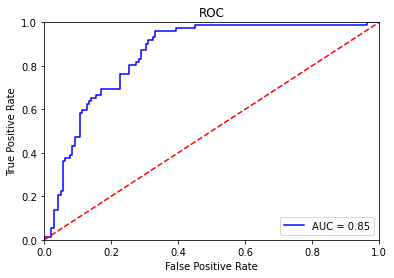

In [46]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probabilities)
roc_auc = metrics.auc(fpr, tpr)


plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Доля правильных ответов (Accuracy) - 77%  
Доля верно классифицированных проголосовавших (корректных единиц) среди всех проголосовавших - 70%  
Доля верно классифицированных проголосовавших среди всех наблюдений - 56%  
Метрика F1 - баланс Precision и Recall. Составляет 62%  

Площадь под кривой (ROC) составляет 0,85. Модель хорошо предсказывает голосование за правящую партию

In [47]:
lr_params = np.append(model.intercept_, model.coef_)

newX = np.append(np.ones((len(X_test),1)), X_test, axis=1)
MSE = (sum((y_test-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = lr_params/ sd_b

p_values =[2*(1-st.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
lr_params = np.round(lr_params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-value"] = [lr_params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  P-value
0        -0.9397            0.435    -2.162    0.032
1        -0.0262            0.000  -104.852    0.000
2         0.1298            0.050     2.580    0.011
3        -1.1142            0.019   -59.353    0.000
4         0.1083            0.020     5.395    0.000
5        -0.0910            0.046    -1.995    0.047
6        -0.0486            0.056    -0.871    0.385
7        -0.0069            0.020    -0.344    0.731
8         0.0310            0.015     2.122    0.035
9        -0.0374            0.045    -0.828    0.409
10        0.1162            0.018     6.292    0.000
11       -0.0053            0.044    -0.121    0.904
12        0.0794            0.003    31.021    0.000
13       -0.4709            0.014   -34.779    0.000
14       -0.0095            0.016    -0.580    0.563
15        0.1526            0.063     2.412    0.017
16       -0.3032            0.030   -10.256    0.000
17        0.2642            0.036     7.413   

На данном шаге я определяю значения коэффициентов и их статистическую значимость (если p-value больше 0.05, коэффициент статистически не значим). Одно из самых больших по модулю и статистически значимых при этом значений наблюдается у предиктора lrscale: при увеличении показателя lrscale на единицу измерения при прочих равных шанс попасть в группу "проголосовавших"  примерно в 1,11 раз меньше. Это означает, что чем более "правых" взглядов придерживается человек, тем с меньшей вероятностью он проголосует за правящую партию. Таким образом, расположение на идеологическом спектре -- самый сильный предикторю

**Вывод:** 
Данные опросов в Швеции позволяют достаточно хорошо предсказать электоральные предпочтения граждан. Самым важным для голосования является расположение на идеологическом спектре